In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('new dataset/colgate_toothpaste_benagluru.csv')

# Display the first few rows of the data
print(data.head())


         date        product_name  sales  promotion
0  01-01-2022  Colgate_Toothpaste   2600          0
1  02-01-2022  Colgate_Toothpaste   2700          0
2  03-01-2022  Colgate_Toothpaste   2500          0
3  04-01-2022  Colgate_Toothpaste   1500          0
4  05-01-2022  Colgate_Toothpaste   1900          0


d:\python\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\python\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


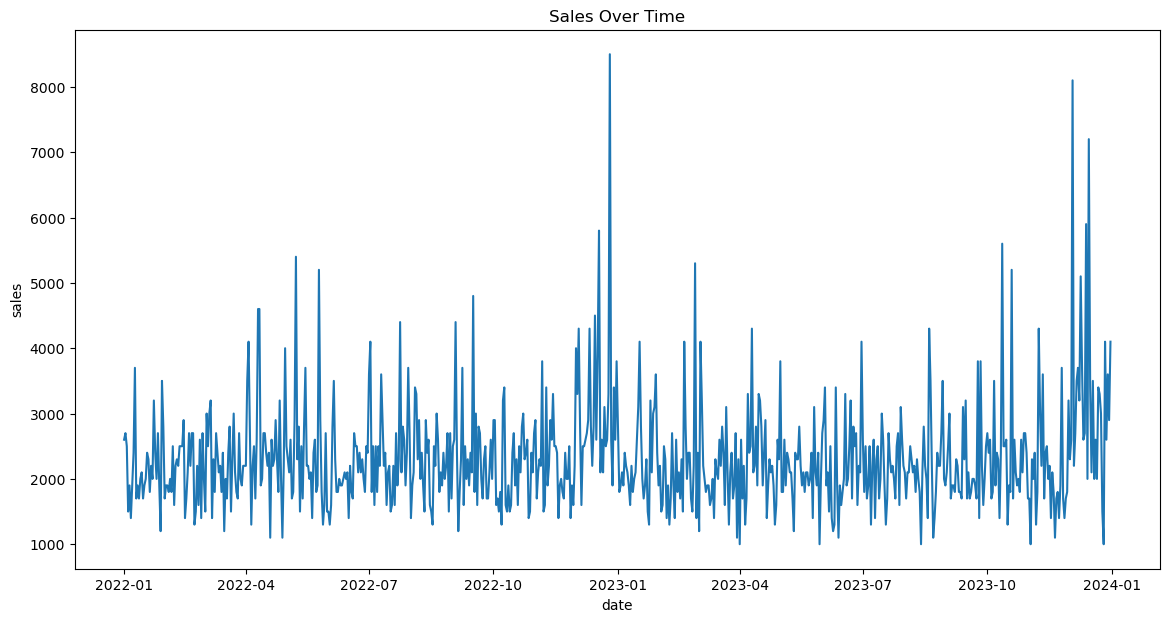

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')
# data['date'] = pd.to_datetime(data['date'])

# Set 'date' as the index
data.set_index('date', inplace=True)

# Plot sales over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='date', y='sales')
plt.title('Sales Over Time')
plt.show()


In [3]:
data['month'] = data.index.month
data['day_of_week'] = data.index.dayofweek

# Check for any promotional events if available in data
if 'promotion' in data.columns:
    data['is_promotion'] = data['promotion'].apply(lambda x: 1 if x == 'yes' else 0)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Features and target variable
X = data[['month', 'day_of_week']]
if 'is_promotion' in data.columns:
    X['is_promotion'] = data['is_promotion']
y = data['sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


C:\Users\shrin\AppData\Local\Temp\ipykernel_4120\2502414490.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['is_promotion'] = data['is_promotion']


LinearRegression()

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

scaled_mae = 100 * (1 - mae/np.mean(y_test))
scaled_rmse = 100 * (1 - rmse/np.std(y_test))

print(f'Accuracy Score: {scaled_mae}' '%')


Accuracy Score: 76.35990032256214%


In [6]:
import pandas as pd

# Example future dates
future_dates = pd.date_range(start='2024-01-01', end='2024-01-31')

# Create a DataFrame for future dates
future_data = pd.DataFrame(future_dates, columns=['date'])
future_data['month'] = future_data['date'].dt.month
future_data['day_of_week'] = future_data['date'].dt.dayofweek

# Add the is_promotion column assuming no promotions
future_data['is_promotion'] = 0

# Predict future demand
future_predictions = model.predict(future_data[['month', 'day_of_week', 'is_promotion']])
future_data['predicted_sales'] = future_predictions
future_data['predicted_sales'] = future_data['predicted_sales'].astype(int)
print(future_data)
print(future_data["predicted_sales"].tail(1))

         date  month  day_of_week  is_promotion  predicted_sales
0  2024-01-01      1            0             0             1839
1  2024-01-02      1            1             0             1930
2  2024-01-03      1            2             0             2021
3  2024-01-04      1            3             0             2112
4  2024-01-05      1            4             0             2203
5  2024-01-06      1            5             0             2294
6  2024-01-07      1            6             0             2385
7  2024-01-08      1            0             0             1839
8  2024-01-09      1            1             0             1930
9  2024-01-10      1            2             0             2021
10 2024-01-11      1            3             0             2112
11 2024-01-12      1            4             0             2203
12 2024-01-13      1            5             0             2294
13 2024-01-14      1            6             0             2385
14 2024-01-15      1     

                          date        sales
2023-12-27 00:00:00 2023-12-27  4100.000000
2023-12-28 00:00:00 2023-12-28  2600.000000
2023-12-29 00:00:00 2023-12-29  3600.000000
2023-12-30 00:00:00 2023-12-30  2900.000000
2023-12-31 00:00:00 2023-12-31  4100.000000
30                  2024-01-31  2021.733259


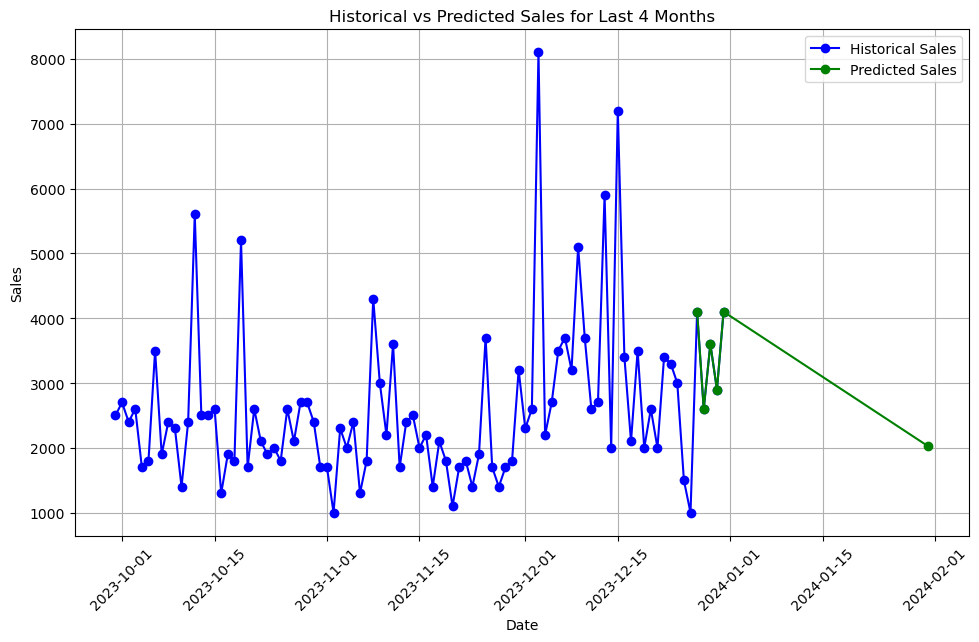

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Example historical data (replace with your actual data)
historical_data = pd.DataFrame({
    'date': pd.date_range(start='2022-01-01', end='2023-12-31'),
    'sales': data['sales']
})

# Example future dates
future_dates = pd.date_range(start='2024-01-01', end='2024-01-31')

# Create a DataFrame for future dates
future_data = pd.DataFrame(future_dates, columns=['date'])
future_data['month'] = future_data['date'].dt.month
future_data['day_of_week'] = future_data['date'].dt.dayofweek

# Add the is_promotion column assuming no promotions
future_data['is_promotion'] = 0

# Predict future demand (example values, replace with actual predictions)
# Here, future_predictions should be replaced with actual predictions from your model


future_data['predicted_sales'] = future_predictions

# Extract last 4 months of historical data
last_4_months = historical_data[historical_data['date'] >= historical_data['date'].max() - pd.DateOffset(months=3)]

# Combine historical data and future predictions
combined_data = pd.concat([last_4_months, future_data[['date', 'predicted_sales']]])
last_5_historical = last_4_months.tail(5)
ft = future_data.rename(columns={'predicted_sales': 'sales'})
# Extract the last row of future predictions
last_future_prediction = ft[['date', 'sales']].tail(1)
# Combine the last 5 historical data and the last future prediction
combined_new = pd.concat([last_5_historical, last_future_prediction])
print(combined_new)
plt.figure(figsize=(10, 6))
plt.plot(combined_data['date'], combined_data['sales'], marker='o', linestyle='-', color='b', label='Historical Sales')
plt.plot(combined_new['date'], combined_new['sales'], marker='o', linestyle='-', color='g', label='Predicted Sales')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Historical vs Predicted Sales for Last 4 Months')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [1]:
from flask import Flask, render_template, request, redirect, url_for, session, flash, jsonify
import os
import pandas as pd
import csv
import io
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

app = Flask(__name__)
app.secret_key = 'Shreewar@project'  # Change this to a secure secret key

# Create products directory if it doesn't exist
if not os.path.exists('products'):
    os.makedirs('products')

# Warehouse options
warehouses = ['bengaluru', 'kocchi', 'chennai', 'kolkata', 'mumbai', 'delhi', 'jaipur']

# Admin credentials file
admin_credentials_file = 'admin_credentials.csv'

# Ensure admin credentials file exists
if not os.path.isfile(admin_credentials_file):
    with open(admin_credentials_file, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['username', 'password', 'warehouse'])

# Load user credentials
user_credentials = pd.read_csv('users.csv')

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/admin_login', methods=['GET', 'POST'])
def admin_login():
    if request.method == 'POST':
        form_type = request.form['form_type']

        if form_type == 'register':
            username = request.form['username']
            password = request.form['password']
            repeat_password = request.form['repeat_password']
            warehouse = request.form['warehouse']

            if password != repeat_password:
                flash('Passwords do not match.', 'error')
                return redirect(url_for('admin_login', warehouses=warehouses))

            with open(admin_credentials_file, 'a', newline='') as csvfile:
                writer = csv.writer(csvfile)
                writer.writerow([username, password, warehouse])

            flash('Registration successful. Please log in.', 'success')
            return redirect(url_for('admin_login', warehouses=warehouses))

        elif form_type == 'login':
            username = request.form['username']
            password = request.form['password']
            warehouse = None

            with open(admin_credentials_file, 'r') as csvfile:
                reader = csv.DictReader(csvfile)
                for row in reader:
                    if row['username'] == username and row['password'] == password:
                        warehouse = row['warehouse']
                        break

            if warehouse:
                session['admin_logged_in'] = True
                session['warehouse'] = warehouse
                return redirect(url_for('admin'))

            flash('Invalid credentials. Please try again.', 'error')
            return redirect(url_for('admin_login', warehouses=warehouses))

    return render_template('admin_login.html', warehouses=warehouses)

@app.route('/admin')
def admin():
    if 'admin_logged_in' not in session or not session['admin_logged_in']:
        return redirect(url_for('admin_login'))

    # Get the warehouse of the logged-in admin
    admin_warehouse = session['warehouse']

    # List all CSV files in the products directory that belong to the admin
    existing_files = []
    for file in os.listdir('products'):
        if file.endswith('.csv') and admin_warehouse in file:
            existing_files.append(file)

    # Prepare existing dates
    existing_dates = {}
    for file in existing_files:
        filename = os.path.basename(file)
        filepath = os.path.join('products', file)
        df = pd.read_csv(filepath)
        existing_dates[filename] = df['date'].tolist()

    return render_template('admin.html', existing_files=existing_files, existing_dates=existing_dates)

@app.route('/create_new', methods=['POST'])
def create_new():
    if 'admin_logged_in' not in session or not session['admin_logged_in']:
        return redirect(url_for('admin_login'))

    product_name = request.form['product_name']
    admin_warehouse = session['warehouse']

    # Create new CSV file with admin's warehouse in the filename
    filename = f"{product_name}_{admin_warehouse}.csv"
    filepath = os.path.join('products', filename)

    # Check if file exists
    if os.path.isfile(filepath):
        # flash(f'File "{filename}" already exists.', 'error')
        return jsonify({'success':False,'message':(f'File "{filename}" already exists.')}),400

    else:
        # Create the new CSV file with headers
        df = pd.DataFrame(columns=['date', 'product_name', 'sales', 'promotion'])
        df.to_csv(filepath, index=False)
        # flash(f'File "{filename}" created successfully.', 'success')
        return jsonify({'success': True, 'message':(f'File "{filename}" created successfully.')}),200

    return redirect(url_for('admin'))

@app.route('/upload', methods=['POST'])
def upload():
    if 'admin_logged_in' not in session or not session['admin_logged_in']:
        return redirect(url_for('admin_login'))

    file = request.files['file']
    if file:
        filename = file.filename
        admin_warehouse = session['warehouse']
        filename_with_warehouse = f"{os.path.splitext(filename)[0]}_{admin_warehouse}.csv"
        filepath = os.path.join('products', filename_with_warehouse)

        # Check if file exists
        if os.path.isfile(filepath):
            return jsonify({'success':False,'message':(f'File "{filename}" already exists.')}),400
        else:
            file.save(filepath)
            # flash(f'File "{filename}" uploaded successfully.', 'success')
            return jsonify({'success': True, 'message':(f'File "{filename}" uploaded successfully.')}),200
    else:
        flash('No file selected.', 'error')

    return redirect(url_for('admin'))

@app.route('/update', methods=['POST'])
def update():
    if 'admin_logged_in' not in session or not session['admin_logged_in']:
        return redirect(url_for('admin_login'))

    selected_file = request.form['filename']
    admin_warehouse = session['warehouse']
    filename = os.path.basename(selected_file)
    filepath = os.path.join('products', filename)

    # Check if the selected file belongs to the logged-in admin
    if admin_warehouse not in filename:
        return jsonify({'success': False, 'message': 'Unauthorized access.'}), 403

    # Read existing data to check for unique date
    try:
        df = pd.read_csv(filepath)
        existing_dates = set(df['date'].tolist())
    except FileNotFoundError:
        return jsonify({'success': False, 'message': f'File "{filename}" not found.'}), 404

    date = request.form['date']
    sales = request.form['sales']
    promotion = request.form['promotion']

    # Validate fields
    if not date or not sales or not promotion:
        return jsonify({'success': False, 'message': 'All fields are required.'}), 400

    # Check if date already exists
    if date in existing_dates:
        return jsonify({'success': False, 'message': f'Date "{date}" already exists in "{filename}". Please choose a different date.'}), 400

    # Get product name from filename
    product_name = os.path.splitext(filename)[0].rsplit('_', 1)[0]

    # Append new data
    new_data = pd.DataFrame({
        'date': [date],
        'product_name': [product_name],
        'sales': [sales],
        'promotion': [promotion]
    })

    df = pd.concat([df, new_data], ignore_index=True)
    df.to_csv(filepath, index=False)

    # Set success message only if data was successfully added
    return jsonify({'success': True, 'message': f'Data updated successfully in "{filename}".'}), 200

@app.route('/user_login', methods=['GET', 'POST'])
def user_login():
    if request.method == 'POST':
        email = request.form['email']
        password = request.form['password']
        user = user_credentials[(user_credentials['Email'] == email) & (user_credentials['Password'] == password)]
        if not user.empty:
            session['user_logged_in'] = True
            session['email'] = email
            return redirect(url_for('user'))
        else:
            flash('Invalid credentials. Please try again.', 'error')
            return render_template('user_login.html')
    return render_template('user_login.html')

@app.route('/user_signup', methods=['POST'])
def user_signup():
    username = request.form['username']
    email = request.form['email']
    password = request.form['password']
    
    # Check if email already exists
    global user_credentials
    if not user_credentials[user_credentials['Email'] == email].empty:
        flash('Email already exists. Please use a different email.', 'error')
        return redirect(url_for('user_login'))

    # Append the new user to the CSV file
    with open('users.csv', 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow([username, email, password])

    # Reload user credentials
    user_credentials = pd.read_csv('demand/users.csv')

    return redirect(url_for('user_login'))

@app.route('/user')
def user():
    if 'user_logged_in' not in session or not session['user_logged_in']:
        return redirect(url_for('user_login'))
    return render_template('user.html', warehouses=warehouses)

@app.route('/validate_product', methods=['POST'])
def validate_product():
    data = request.json
    product_name = data.get('product_name')
    warehouse = data.get('warehouse')
    
    products_folder = 'products'  # Replace with your products folder path
    files = os.listdir(products_folder)
    
    for file in files:
        file_product, file_warehouse = file.rsplit('_', 1)[0], file.rsplit('_', 1)[-1].replace('.csv', '')
        if file_product == product_name and file_warehouse == warehouse:
            return jsonify({'valid': True, 'message': 'Product exists'}), 200
    
    return jsonify({'valid': False, 'message': 'Product does not exist'}), 404

@app.route('/data')
def data():
    # Generate the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(combined_data['date'], combined_data['sales'], marker='o', linestyle='-', color='b', label='Historical Sales')
    ax.plot(combined_new['date'], combined_new['sales'], marker='o', linestyle='-', color='g', label='Predicted Sales')
    ax.set_xlabel('Date')
    ax.set_ylabel('Sales')
    ax.set_title('Historical vs Predicted Sales')
    ax.legend()
    ax.grid(True)
    plt.xticks(rotation=45)

    # Convert plot to PNG image
    output = io.BytesIO()
    FigureCanvas(fig).print_png(output)
    plt.close(fig)  # Close the figure to release memory

    # Return the plot as HTML
    return render_template('index.html', plot_url=output.getvalue().decode('utf8'))

if __name__ == '__main__':
    app.run(debug=True, port=5001)


C:\Users\shrin\AppData\Local\Temp\ipykernel_21092\1889433130.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ModuleNotFoundError: No module named 'matplotlib'